# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'ten-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 64,
  "PH2" : False,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 72,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_TINY,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 40000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,f0_h1z,f0_h2x,f0_h2y,f0_h2z,...,f11_h20z,f11_p0x,f11_p0y,f11_p0z,f11_p11x,f11_p11y,f11_p11z,f11_p12x,f11_p12y,f11_p12z
0,0,-1.249471,0.762578,-1.087758,-1.248198,0.642059,-0.084764,-1.288189,0.496006,0.278272,...,1.925565,0.758328,1.303214,-0.373432,0.353047,1.957791,0.090679,0.490856,1.483194,-0.089068
1,1,-1.316998,0.568669,0.803171,-1.344481,0.506054,-0.315874,-1.433732,0.364952,0.307462,...,0.742355,0.754893,1.143510,-0.422302,0.298791,1.940198,-0.136335,0.360447,1.518121,-0.307438
2,2,-1.402664,0.485205,1.971513,-1.403316,0.369752,1.876095,-1.430830,0.320482,1.846240,...,-0.343745,0.439059,1.132169,-0.088275,0.146941,1.872387,0.199826,0.305718,1.660977,0.177626
3,3,-1.345144,0.680282,0.903317,-1.398263,0.623878,-0.940356,-1.480552,0.511176,-0.578380,...,0.187662,0.407200,1.375289,-0.460012,0.260944,1.994121,0.008667,0.321124,1.675484,-0.117029
4,4,-1.281652,0.493530,0.825777,-1.270526,0.496584,-0.172231,-1.303218,0.405305,0.429661,...,0.813398,0.414059,1.223254,-0.110432,0.174367,1.808777,0.020503,0.267640,1.697638,-0.043918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,5,1.144508,-0.230624,-0.832086,1.104717,-0.212518,-0.577029,1.088548,-0.216164,-0.422533,...,0.438221,-0.317800,0.370215,0.335930,0.217825,0.541508,0.673085,-0.165426,0.906719,0.444305
1047,6,1.102713,-0.077886,-1.082569,1.071477,-0.113318,0.263157,1.089943,-0.159116,0.522884,...,0.651445,-0.109218,0.692303,0.561060,0.158645,0.777863,0.932445,-0.197113,1.281960,0.863388
1048,7,1.327790,-0.135445,-1.105791,1.535900,-0.318718,1.474287,1.670898,-0.410178,1.627947,...,1.271191,-0.310081,0.758877,0.548901,0.124032,0.790395,0.848906,-0.260934,1.299568,0.732606
1049,8,1.302391,-0.040928,-2.242462,1.260774,-0.221310,1.338268,1.314896,-0.228036,1.109245,...,0.084516,-0.193123,0.741032,0.043547,0.149228,0.819228,0.598846,-0.152489,1.361033,0.360702


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.933649289099526
0.95260663507109
0.9332767363967885
0.9379302059496567
0.9325541125541126


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:239: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


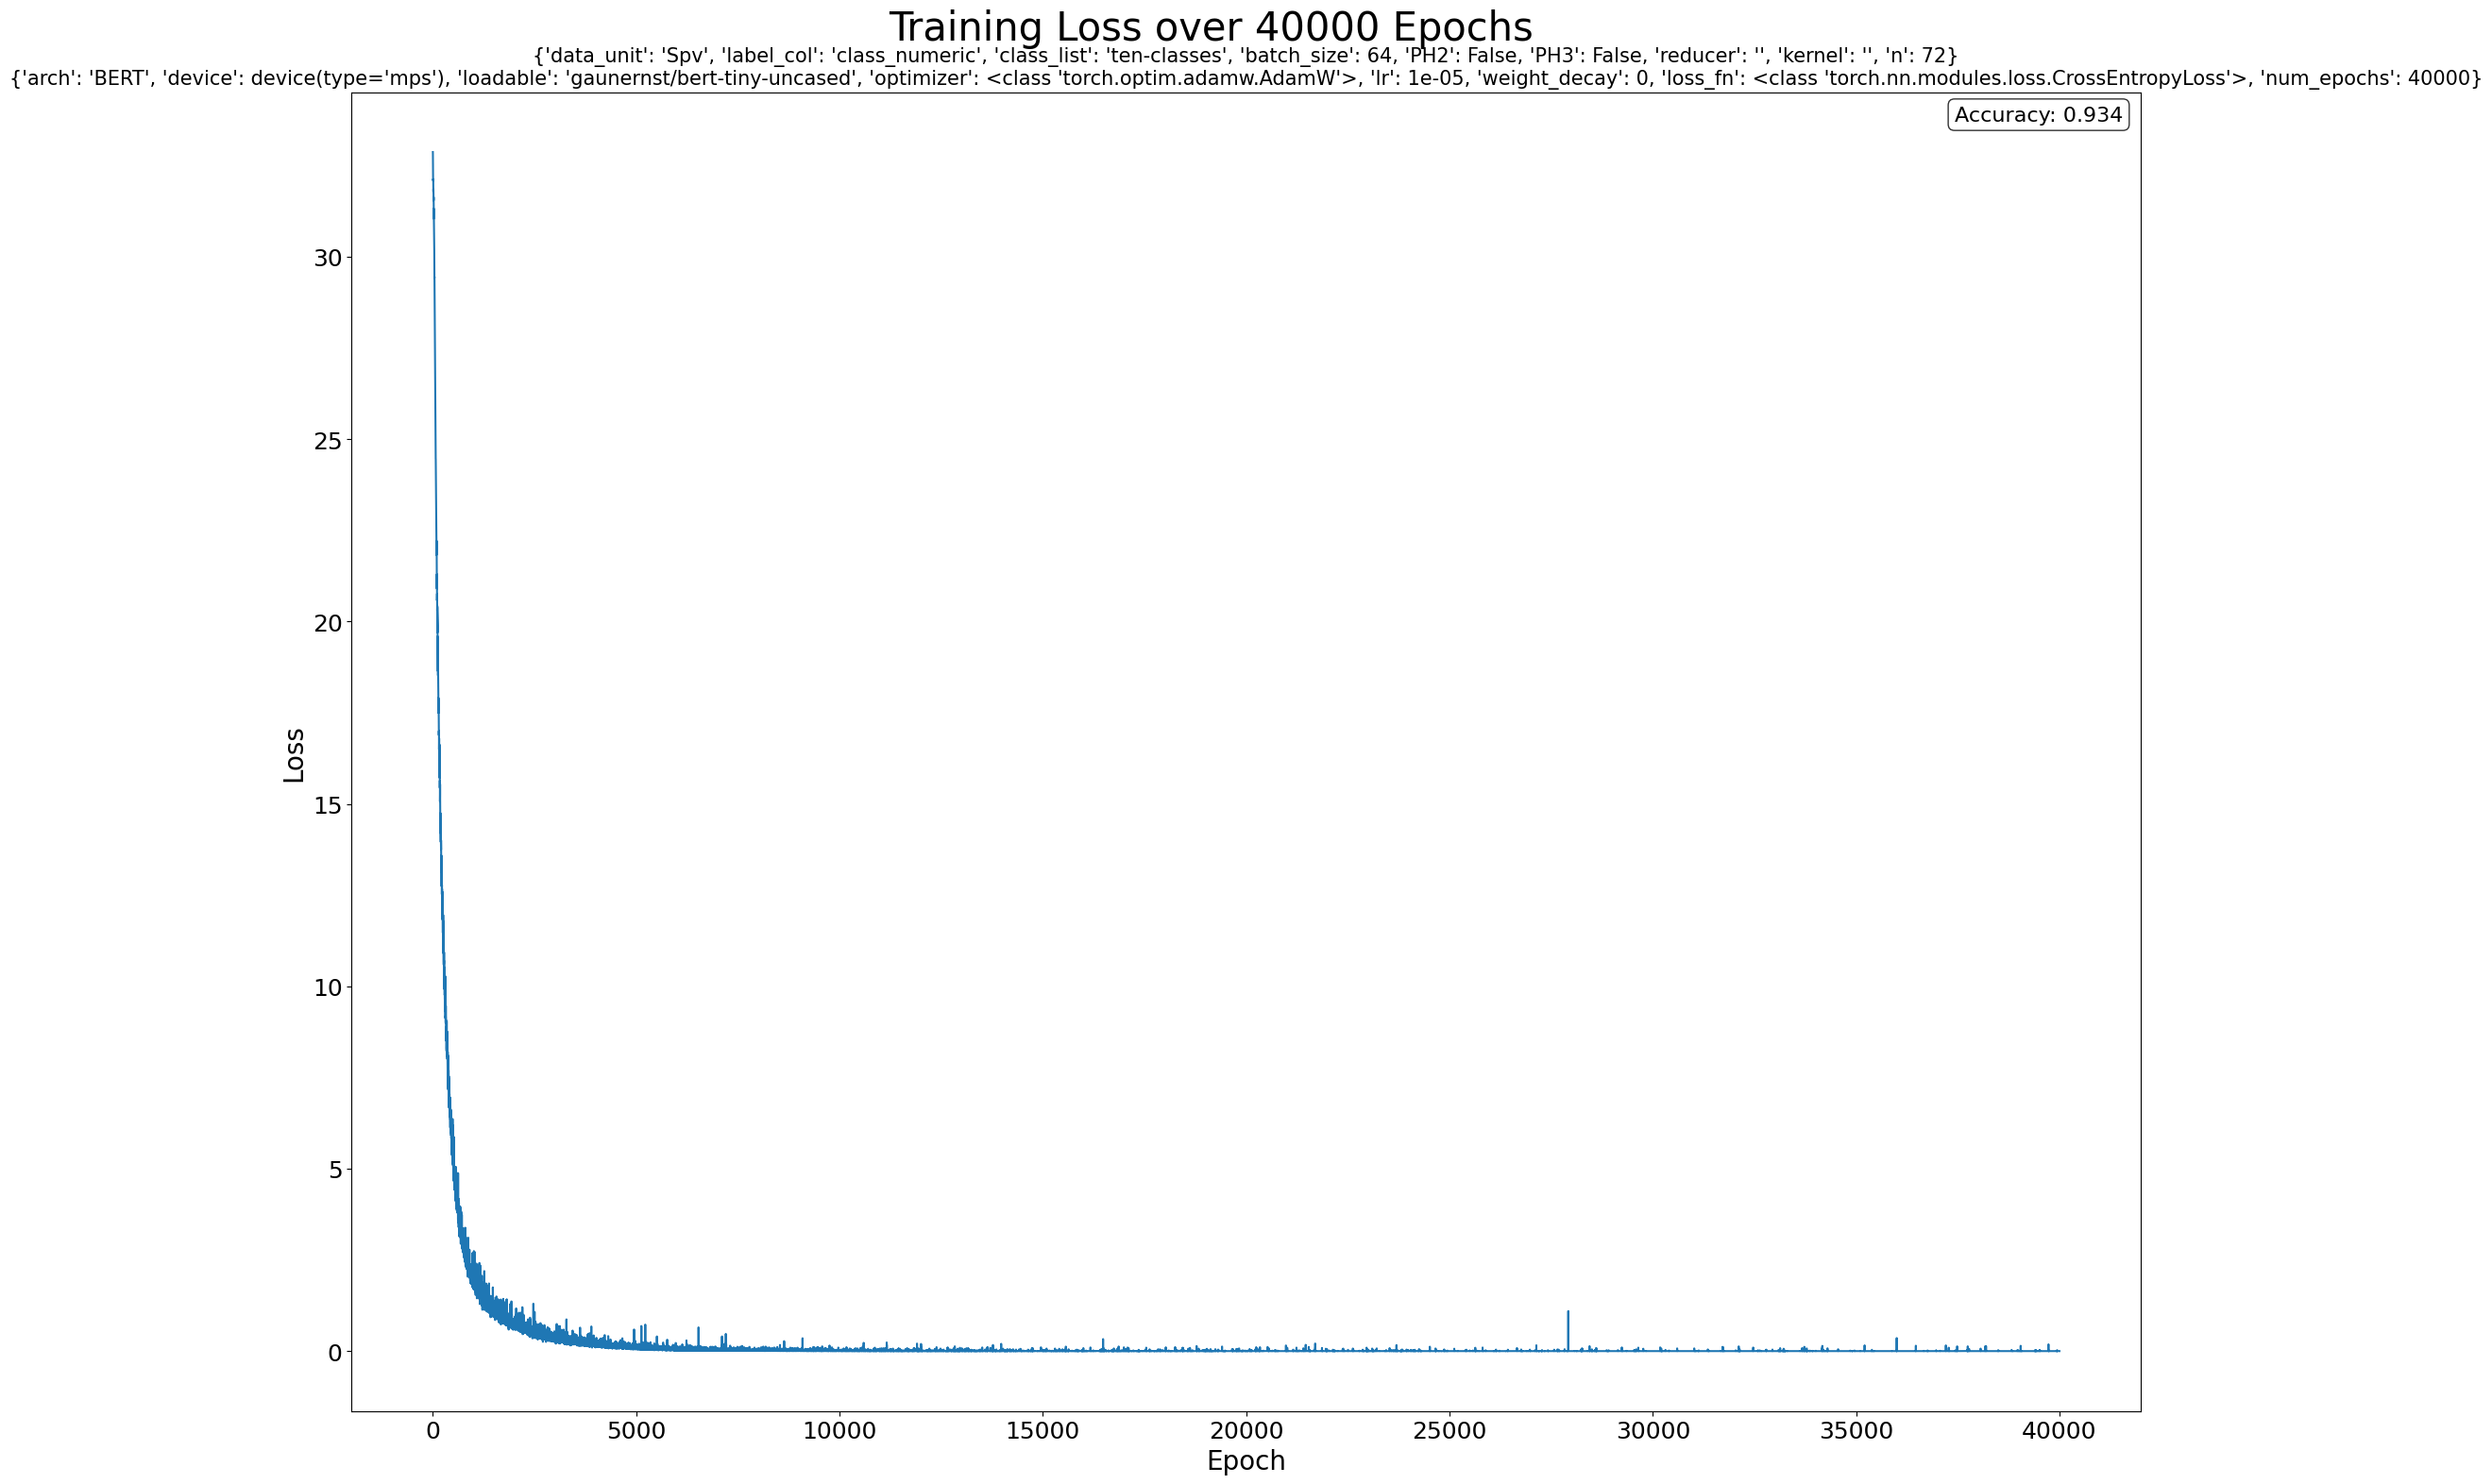

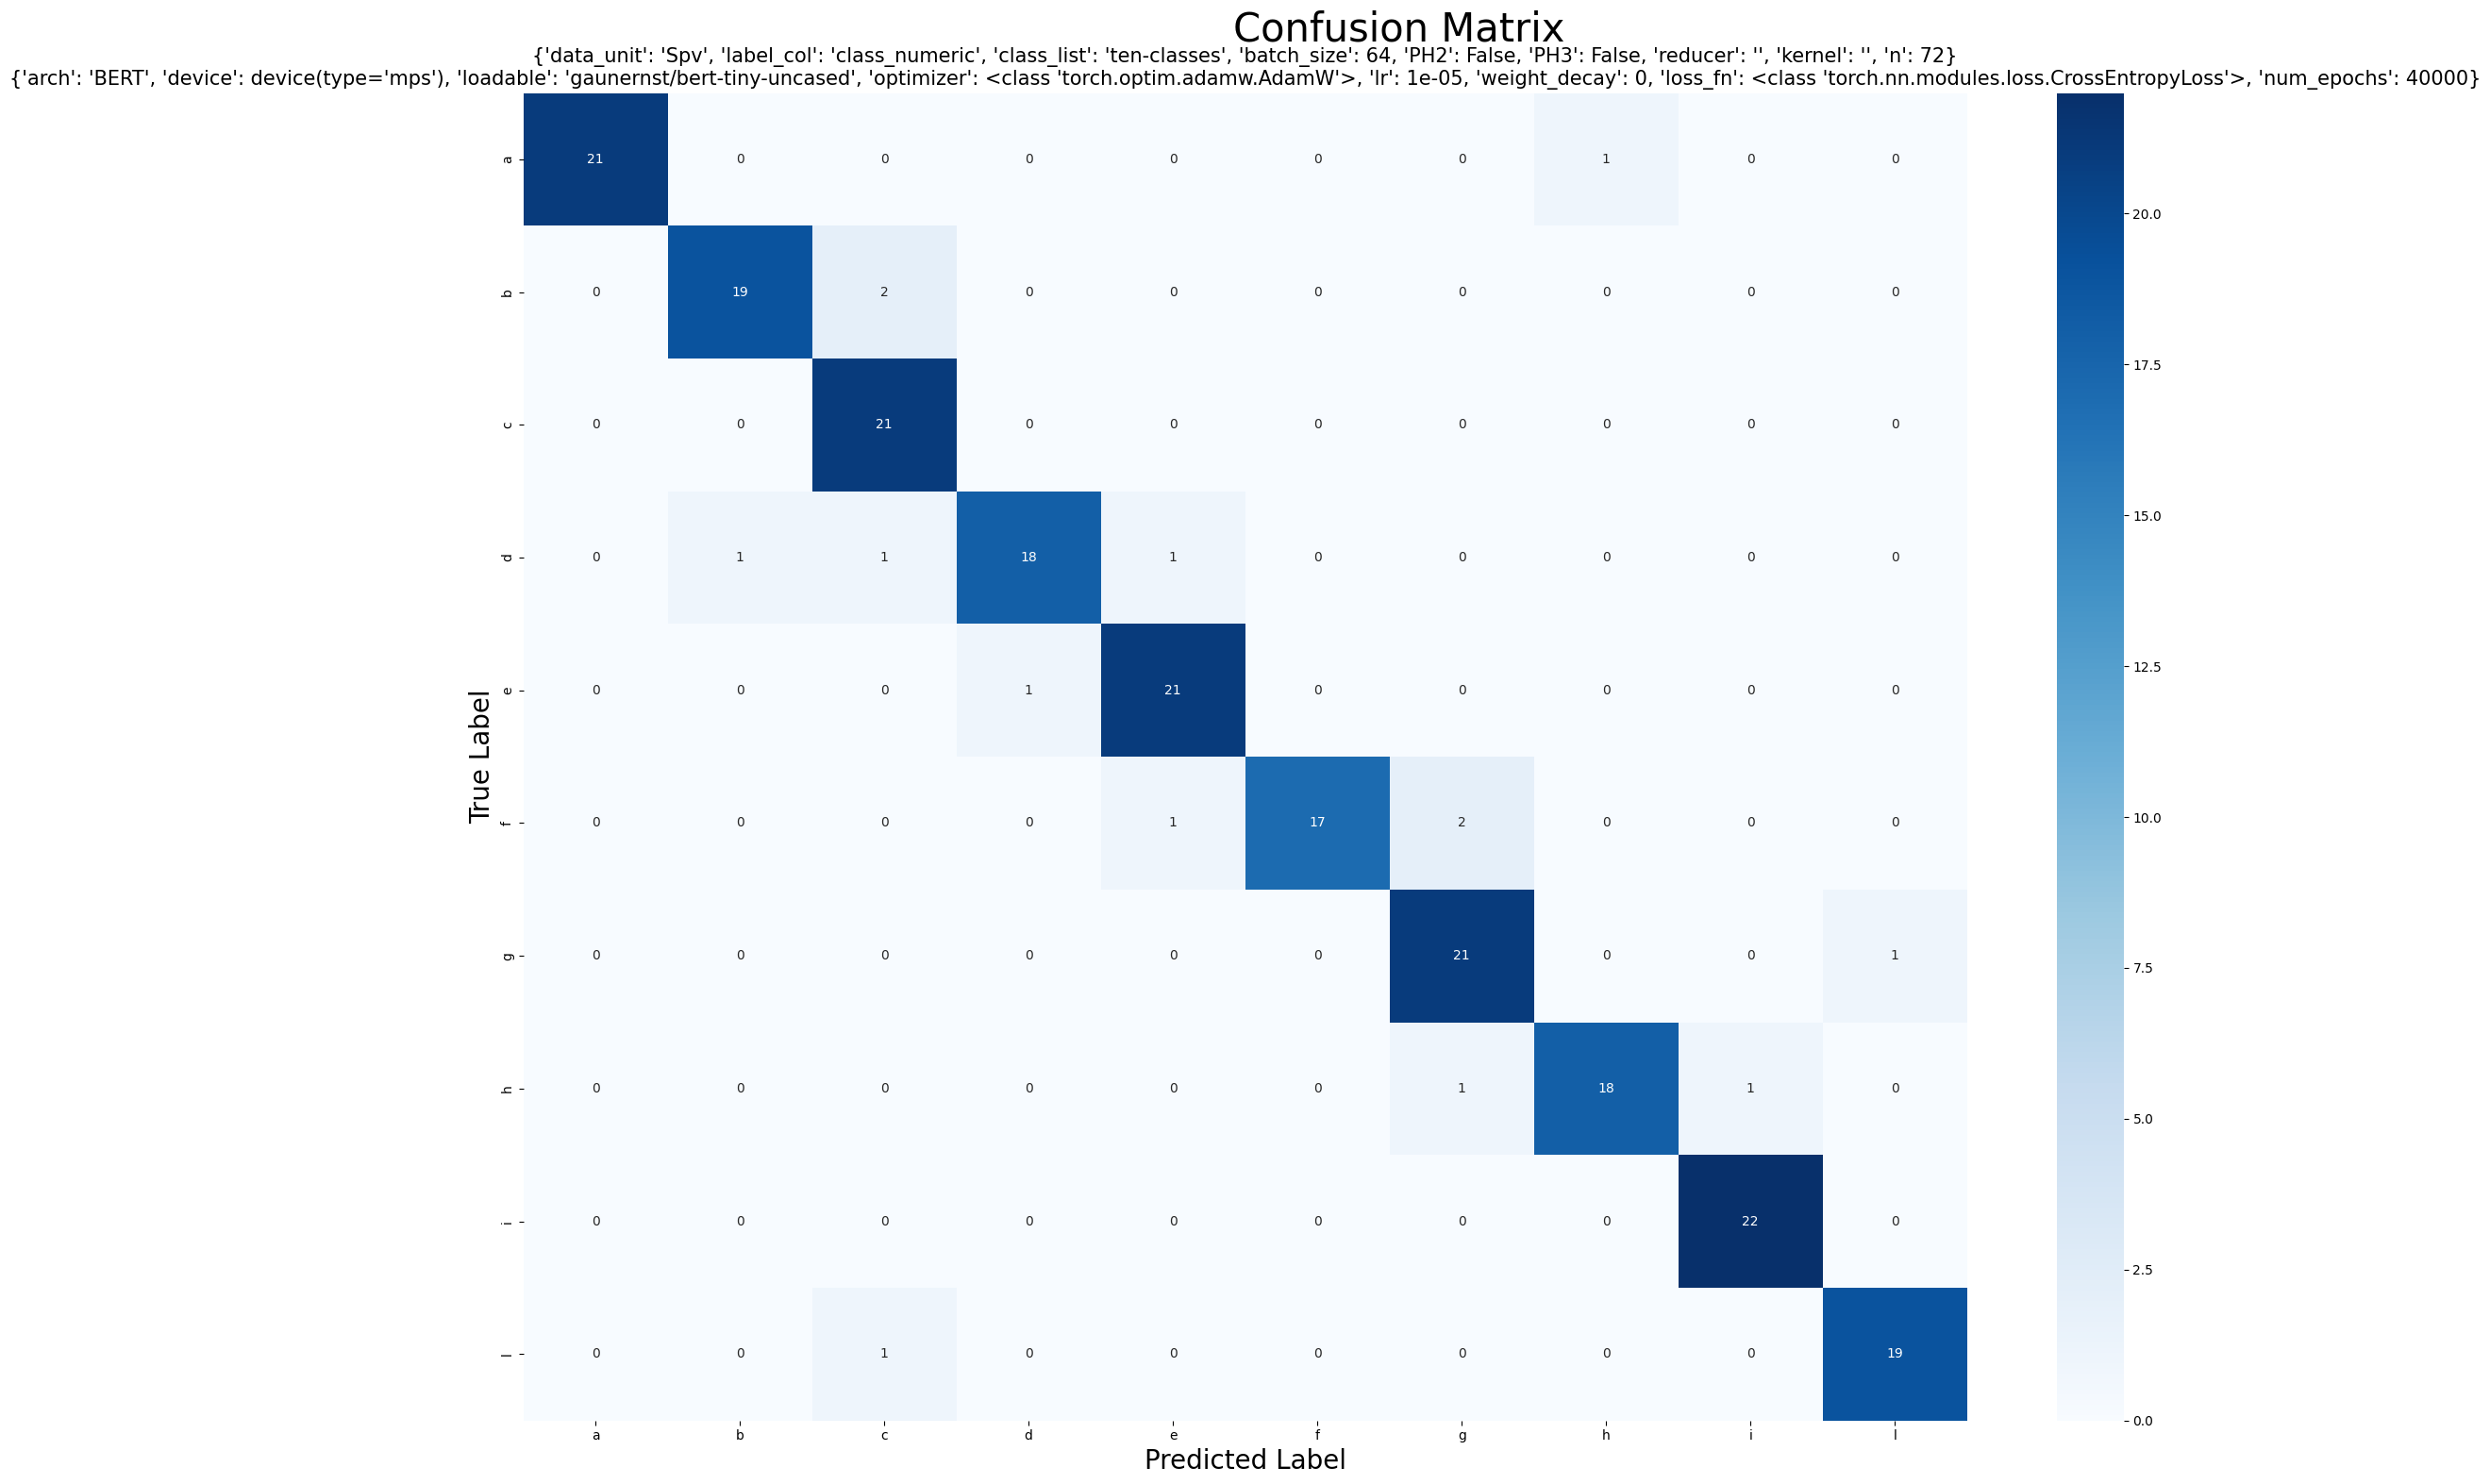

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

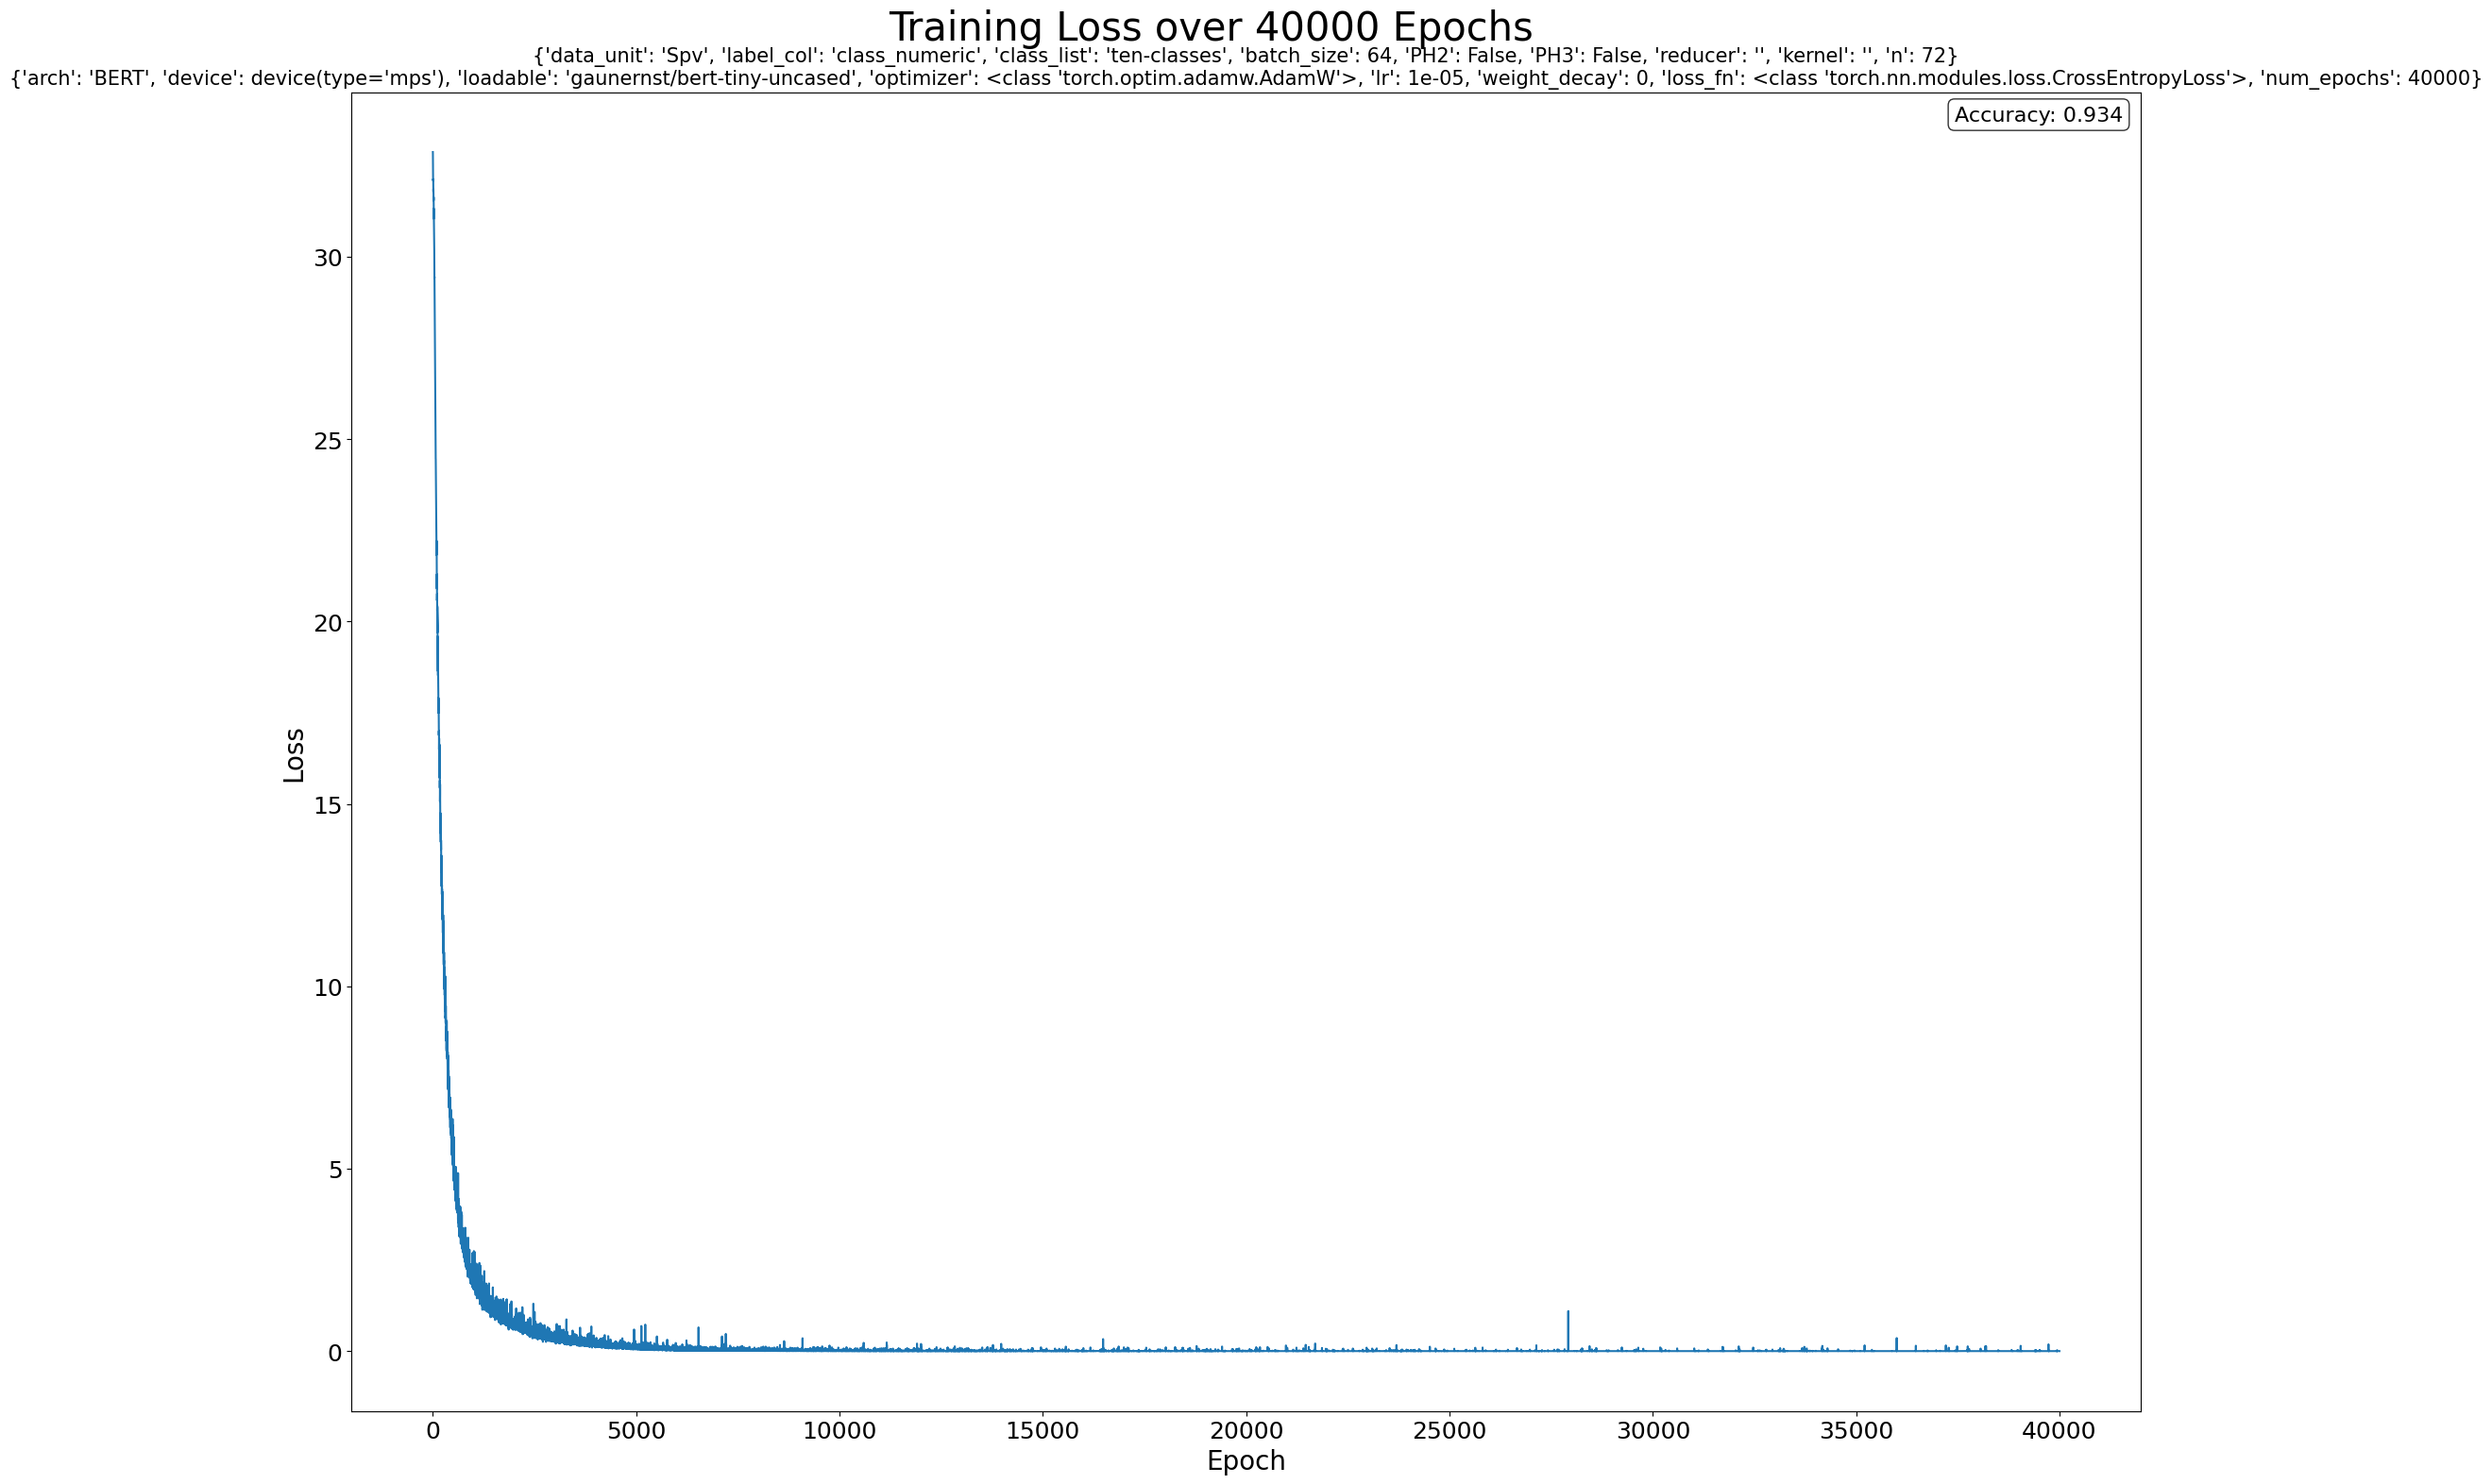

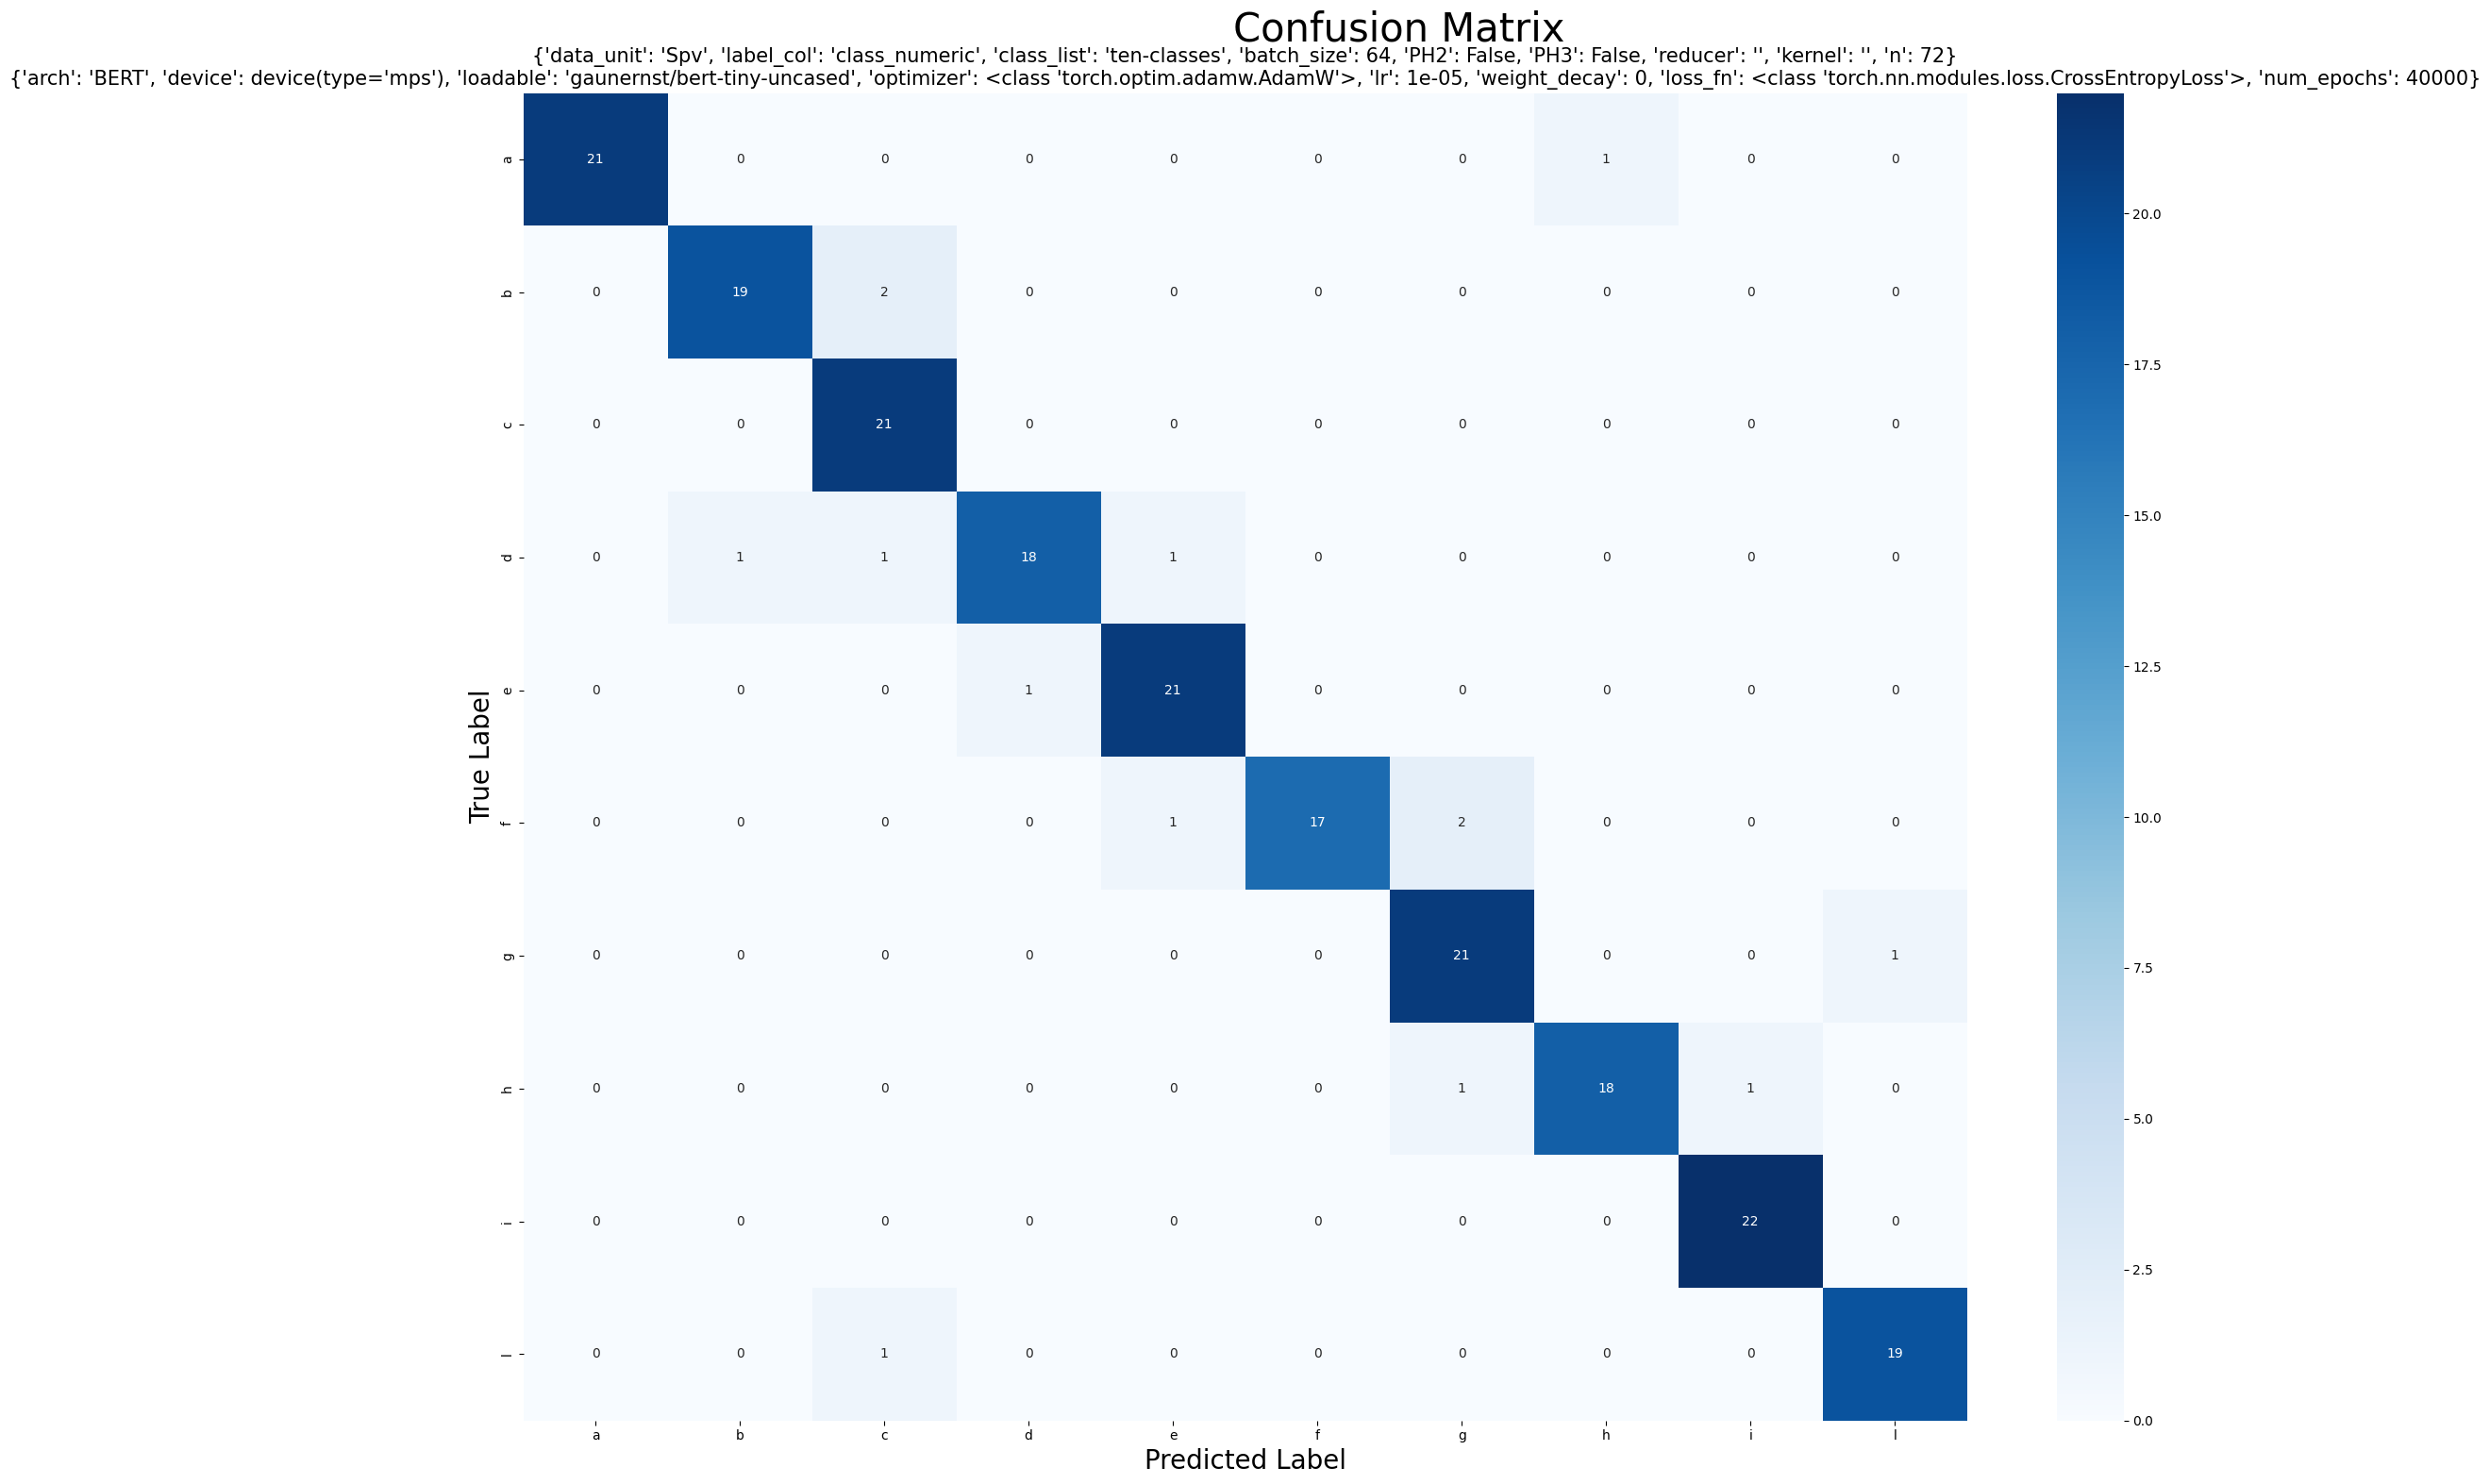

In [10]:
model.keep()
#bert.clean_bert()